# Chi-Squared Test for Independence #

In this notebook we will learn:

- How to organize categorical data into a two-way table
- How to understand a two-way table
- How to run and interpret a Chi-squared test for independence, using `scipy.stats.chi2` command



In [7]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import scipy.stats

from IPython.core.display import display, HTML
toggle_code_str = '''
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Hide Code (Too Advanced or Not the Point)"></form>
'''

toggle_code_prepare_str = '''
    <script>
    function code_toggle() {
        if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
    }
    </script>

'''

display(HTML(toggle_code_prepare_str + toggle_code_str))

def hide_code():
    display(HTML(toggle_code_str))


## Randomized Control Experiment ##

An experiment was conducted to determine if the use of botox could reduce migraines.  There was a control group that did not receive botox and a treatment group that did.  A result of 1 indicates that the patient indicated a reduction of pain due to migraines.


In [8]:
botox = Table.read_table('bta.csv')
botox.show()

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


In [77]:
tab = botox.pivot('Result', 'Group')
tab

C:\Users\bbailey\AppData\Local\Continuum\anaconda3\lib\site-packages\datascience\tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


Group,0.0,1.0
Control,14,2
Treatment,6,9


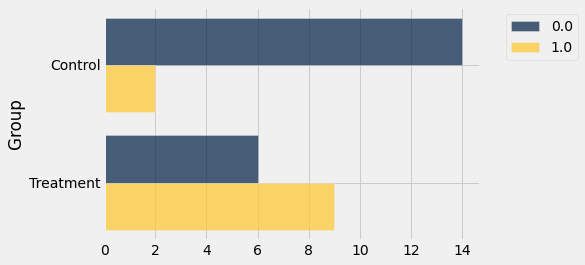

In [10]:
tab.barh("Group")

In [11]:
from scipy.stats import chi2_contingency as chisq

$H_o$: There is no difference between groups (the distribution of 1's and 0's is about the same in each group)

$H_a$: There is a difference between groups

With p < 0.05, we conclude that there is a difference between groups.   

In [54]:
## To run a chi-squared test, copy this cell and change the
## observed table.


obs = np.array([[14, 2], [6,9]])
Results  = chisq(obs)

## Don't change anything below this line

print("Chi-Square = ", Results[0])
print("p-value = ", Results[1])
print("degrees of freedom = ", Results[2])
print("Expected Table = ")
print(Results[3])

print("Reminder: No zero cells, and not more than 20% with counts below 5.")


Chi-Square =  5.696396780303031
p-value =  0.016999777502603477
degrees of freedom =  1 (Rows - 1)*(Columns - 1)
Expected Table = 
[[10.32258065  5.67741935]
 [ 9.67741935  5.32258065]]
Reminder: No zero cells, and not more than 20% with counts below 5.


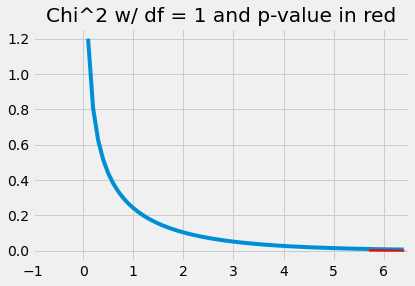

In [55]:
from scipy.stats import chi2

rv = chi2(df=1)     #, loc=0, scale=1
x = np.arange(0.1, 6.5, 0.1)
y = rv.pdf(x) 

plots.xlim(-1,6.5)
#plots.ylim(-.01, 0.3)
plots.plot(x,y)
plots.fill_between(x, y, where = abs(x) > 5.696, color="r",zorder=4)
plots.title("Chi^2 w/ df = 1 and p-value in red");

hide_code()

In [1]:
9/15

0.6

In [2]:
2/16

0.125

In [47]:
botox.group('Group', np.average)

Group,Result average
Control,0.125
Treatment,0.6


### Reporting out ###

#### We find that 60% of patients in the treatment group reported positive results is 60%, while 12.5% of those in the control group reported positive results; these results are statistically significant ($\chi^2$ = 5.696, p = 0.017).  ####


The $\chi^2$ test for independence finds its test statistic the same way as the Goodness of Fit test:

$$\chi^2 = \sum \frac{(Observed - Expected)^2}{Expected}$$

But the expected results are calculated from the observed results assuming that the variables are independent.  

If $R$ is the number of rows and $C$ is the number of columns, then the degrees of freedom are $df = (R - 1)(C-1)$.  

Then the p-value is the shaded region under the appropriate $\chi^2$-graph beyond the value of the test statistic.  


## Titanic Data ##

Consider this data showing the distribution of those that survived the sinking of the Titanic by gender.

Was there any significant difference in the probability of members of the different genders surviving?


Gender,Died,Lived
M,1364,367
F,126,344


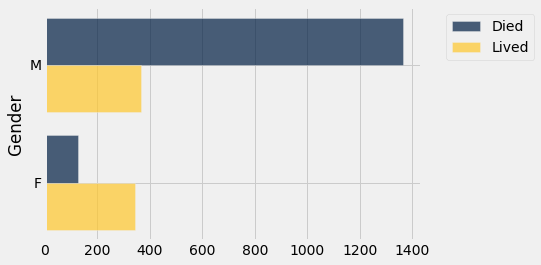

In [36]:
T_gender = Table().with_columns("Gender", make_array("M", "F"), "Died", make_array(1364, 126), "Lived", make_array(367,344))
T_gender.barh("Gender")

T_gender

In [37]:
titanic_gender = np.array([[1364, 367], [126, 344]])

titanic_gender

array([[1364,  367],
       [ 126,  344]])

In [38]:
titanic_gender = np.array([[1364, 367], [126, 344]])
Results  = chisq(titanic_gender)

print("Chi-Square = ", Results[0])
print("p-value = ", Results[1])
print("degrees of freedom = ", Results[2])
print("Expected Table = ")
Results[3]

Chi-Square =  454.4998451882265
p-value =  7.565461964935766e-101
degrees of freedom =  1
Expected Table = 


array([[1171.82644253,  559.17355747],
       [ 318.17355747,  151.82644253]])

In [39]:
Percent_men_died = 1364/(1364+367)
Percent_men_died

0.7879838243789717

In [40]:
Percent_women_died = 126/(126+344)
Percent_women_died

0.2680851063829787

In [41]:
Percent_died_were_women = 126/(1364+126)

Percent_died_were_women

0.08456375838926175

In [42]:
Percent_lived_were_women = 344/(367+344)
Percent_lived_were_women

0.4838255977496484

### Reporting Out ###

#### The Chi-squared analysis reveals that there is some relationship between a person's gender and whether that person survived the sinking of the Titanic ($\chi^2$ = 454.500, p <0.001); 79% of the men onboard died while only 27% of the women onboard died.  ####

<table>
    <caption> Percent Survived by Gender </caption>
    <tr> 
        <th> Gender </th>
        <th> % Died </th>
        <th> % Lived </th>
    </tr>
    <tr>
        <td> Male </td>
        <td> 78.9 </td>
        <td> 21.1 </td>
    </tr>
    <tr>
        <td> Female </td>
        <td> 26.8 </td>
        <td> 73.2 </td>
    </tr>   
</table>

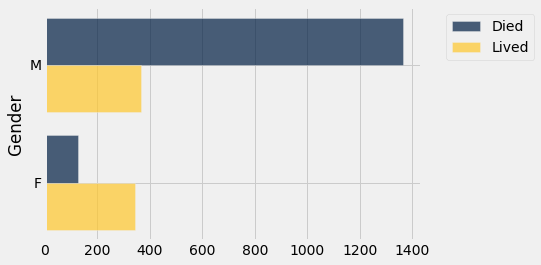

In [43]:
T_gender.barh("Gender")

### On the other hand, the distribution of genders amongst the survivors was 48.4% female and 51.5% male.  So this warrants further investigation. ###

Since we're looking more closely at this data, let's consider the impact of class on survivorship.

In [56]:
titanic_class = np.array([[122,203],[167,118],[528,178],[673,212]])

T_class = Table().with_columns("Class", make_array("1st", "2nd", "3rd", "Crew"), "Died", make_array(122, 167, 528, 673), "Lived", make_array(203, 118, 178, 212  ))

T_class

percent_lived = T_class.column(2)/(T_class.column(2) +T_class.column(1) )

T_class = T_class.with_column("% Lived", percent_lived)

T_class

Class,Died,Lived,% Lived
1st,122,203,0.624615
2nd,167,118,0.414035
3rd,528,178,0.252125
Crew,673,212,0.239548


In [57]:
titanic_class = np.array([[122,203],[167,118],[528,178],[673,212]])
Results  = chisq(titanic_class)

print("Chi-Square = ", Results[0])
print("p-value = ", Results[1])
print("degrees of freedom = ", Results[2])
print("Expected Table = ")
Results[3]

Chi-Square =  190.40110361683327
p-value =  4.999927529868003e-41
degrees of freedom =  3
Expected Table = 


array([[220.01363017, 104.98636983],
       [192.93502953,  92.06497047],
       [477.93730123, 228.06269877],
       [599.11403907, 285.88596093]])

### Reporting Out ###

#### The Chi-squared analysis reveals that there is some relationship between a person's class and whether that person survived the sinking of the Titanic ($\chi^2$ = 190.4, p <0.001); 62% of the passengers in First Class survived, 41% of those in Second Class survived, while 25% of those in Third Class survived and only 24% of the Crew survived.  See Table and Figure below.  ####

<table>
    <caption> Percent Survived by Class </caption>
    <tr> 
        <th> Class </th>
        <th> Suvived % </th>
    </tr>
    <tr>
        <td> First </td>
        <td> 62.5 </td>
    </tr>
    <tr>
        <td> Second </td>
        <td> 41.1 </td>
    </tr>
    <tr>
        <td> Third </td>
        <td> 25.2 </td>
    </tr>        
    <tr>
        <td> Crew </td>
        <td> 24.0 </td>
    </tr>
    
</table>



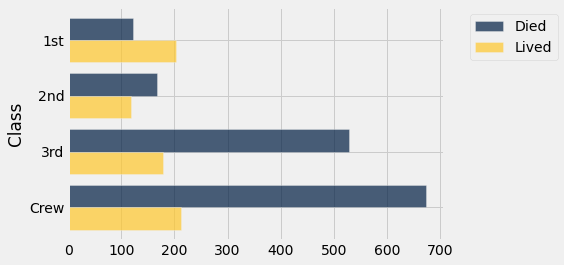

In [58]:
T_class.drop('% Lived').barh("Class")

### If Class had an impact on who survived, and Gender did as well, could there also be a relationship between Gender and Class? ###


In [59]:
titanic_gend_class = np.array([[180,145],[179,106],[510,196],[862,23]])

T_gend_class = Table().with_columns("Class", make_array("1st", "2nd", "3rd", "Crew"), "Male", make_array(180, 179, 510, 862), "Female", make_array(145, 106, 196, 23))

Results = chisq(titanic_gend_class)

print("Chi-Square = ", Results[0])
print("p-value = ", Results[1])
print("degrees of freedom = ", Results[2])
print("Expected Table = ")
Results[3]

Chi-Square =  349.9145062386271
p-value =  1.5566368378932688e-75
degrees of freedom =  3
Expected Table = 


array([[255.5997274 ,  69.4002726 ],
       [224.14129941,  60.85870059],
       [555.24125398, 150.75874602],
       [696.01771922, 188.98228078]])

In [60]:
percent_female = T_gend_class.column(2)/(T_gend_class.column(2) +T_gend_class.column(1)  )

T_gend_class = T_gend_class.with_columns("% Female", percent_female, "% Male", 1-percent_female)

T_gend_class 

Class,Male,Female,% Female,% Male
1st,180,145,0.446154,0.553846
2nd,179,106,0.37193,0.62807
3rd,510,196,0.27762,0.72238
Crew,862,23,0.0259887,0.974011


### Reporting Out ###

#### The Chi-squared analysis reveals that there is some relationship between a person's class and whether that person survived the sinking of the Titanic ($\chi^2$ = 349.915, p <0.001); see Table and Figure below.  ####

<table>
    <caption> Percent Gender by Class </caption>
    <tr> 
        <th> Class </th>
        <th> Female % </th>
        <th> Male % </th>
    </tr>
    <tr>
        <td> First </td>
        <td> 44.6 </td>
        <td> 55.4 </td>
    </tr>
    <tr>
        <td> Second </td>
        <td> 37.2 </td>
        <td> 62.8 </td>
    </tr>
    <tr>
        <td> Third </td>
        <td> 27.8 </td>
        <td> 72.2 </td>
    </tr>        
    <tr>
        <td> Crew </td>
        <td> 2.6 </td>
        <td> 97.4 </td>
    </tr>
    
</table>

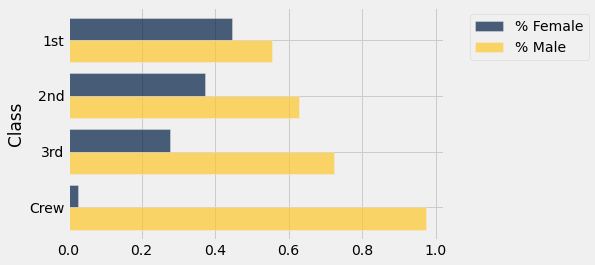

In [61]:
T_gend_class.drop("Male", "Female").barh("Class")

## Recall what it means for variables to confound ##

Is that going on here?

# Testing the Hypothesis with Simulations

In [62]:
def difference_of_props(table, numeric_label, group_label):
    """
    Takes: name of table, column label of numerical variable,
    column label of group-label variable
    
    Returns: Difference of proportions of the two groups
    """
    
    #table with the two relevant columns
    reduced = table.select(numeric_label, group_label)  
    
    # table containing group means
    count_table = reduced.group(group_label)
    
    success_table = reduced.group(group_label, sum)
    
    # array of group means
    props = success_table.column(1)/count_table.column(1)
    
    return props.item(1) - props.item(0)

In [63]:
def one_simulated_difference(table, numeric_label, group_label):
    """
    Takes: name of table, column label of numerical variable,
    column label of group-label variable
    
    Returns: Difference of props of the two groups after shuffling labels
    """
    
    # array of shuffled labels
    shuffled_labels = table.sample(
        with_replacement = False).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(numeric_label).with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_props(
        shuffled_table, numeric_label, 'Shuffled Label')   

In [64]:
observed_diff = difference_of_props(botox, 'Result', 'Group')
observed_diff

0.475

In [65]:
one_simulated_difference(botox, 'Result', 'Group')

0.08750000000000002

In [66]:
simulated_diffs = make_array()

for i in np.arange(10000):
    sim_diff = one_simulated_difference(botox, 'Result', 'Group')
    simulated_diffs = np.append(simulated_diffs, sim_diff)

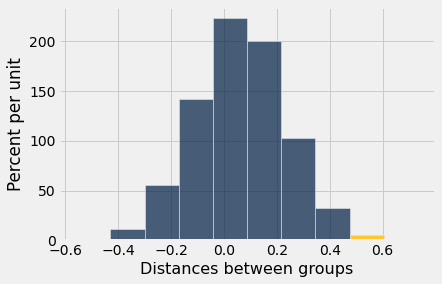

In [67]:
col_name = 'Distances between groups'
Table().with_column(col_name, simulated_diffs).hist(col_name,  left_end=observed_diff)

In [68]:
# p-value
sum(simulated_diffs >= observed_diff)/len(simulated_diffs)

0.0078

In [69]:
G1 = make_array("M", "F")

Gender = np.repeat(G1, [1731, 470])

S1 = make_array(1, 0, 1, 0)

Survived = np.repeat(S1, [367, 1364, 344, 126])
Survived

Long_Titanic = Table().with_columns("Gender", Gender, "Survived", Survived)

Long_Titanic.show(5)

Gender,Survived
M,1
M,1
M,1
M,1
M,1


In [70]:
observed_diff = difference_of_props(Long_Titanic, 'Survived', 'Gender')
observed_diff

-0.5198987179959929

In [71]:
simulated_diffs = make_array()

for i in np.arange(500):
    sim_diff = np.round(one_simulated_difference(Long_Titanic, 'Survived', 'Gender'), 3)
    simulated_diffs = np.append(simulated_diffs, sim_diff)

C:\Users\bbailey\AppData\Local\Continuum\anaconda3\lib\site-packages\datascience\tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


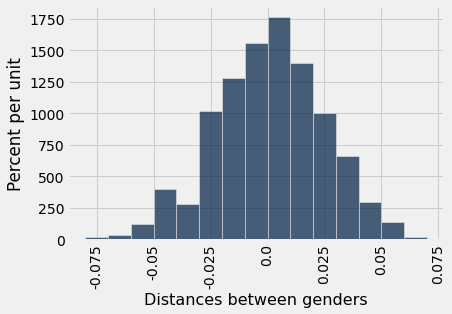

In [73]:
col_name = 'Distances between genders'
Table().with_column(col_name, simulated_diffs).hist(col_name, bins = np.arange(-0.08, 0.08, 0.01))
plots.xticks(make_array(-0.075, -0.05, -0.025, 0, 0.025,0.05, 0.075), make_array(-0.075, -0.05, -0.025, 0, 0.025,0.05, 0.075) );



In [74]:
# p-value
sum(simulated_diffs <= observed_diff)/len(simulated_diffs)

0.0

### Reporting Out ###

#### Of the men onboard, 79% died while only 27% of the women onboard died; this difference in percentage, 52%, never occurred in our simulation.  Therefore, our simulated p-value is 0 and we conclude that gender had some relationship with whether someone survived.  ####